In [5]:
from matplotlib import pyplot as plt
from utils.utils import *
import utils.promethee_functions as pf
import utils.clustering_functions as cf

In [6]:
data = read_data()

K = data.columns.shape[0] # Nb of criteria
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series
N = data.shape[0] # Nb of alternatives

W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
P = [10, 0.4, 20, 0.3, 5, 5]
Q = [1, 0.03, 2, 0.01, 0.5, 0.5] # Indifference thresholds

Reading HDI dataset
co2prod: min=0.0, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=85.473
gdi: min=0.383, max=1.041
eys: min=3.5751, max=23.2477
mys: min=1.4606, max=14.2559


In [7]:
phi_c_all = pf.get_all_Phi_c(data, P,Q, L) # compute all mono criterion flows series
PHI = pf.PHI_all(phi_c_all, W, N, L, K) # Aggregate to the net flow series

c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


In [8]:
# Transform PHI into a dataframe with ISO3 as index and years as columns
PHI_df = pd.DataFrame(PHI, index=data.index, columns=np.arange(1990, 2023))

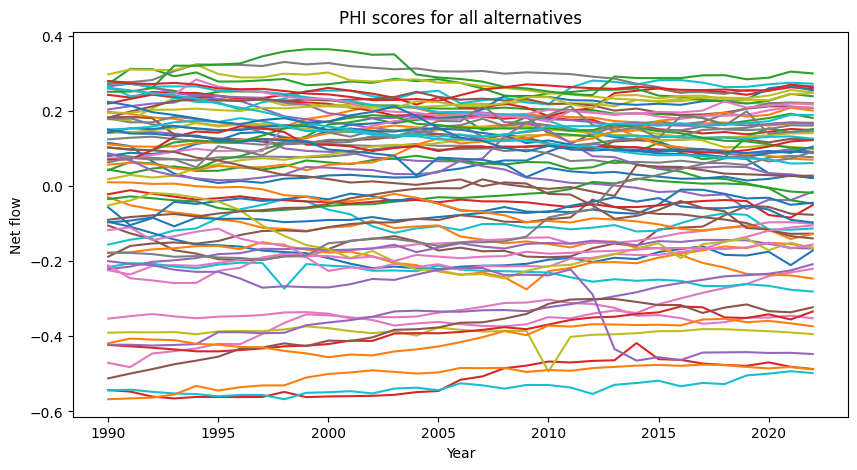

In [9]:
plot_PHI(PHI_df, False)

In [10]:
k = 5
results = cf.kMeans(PHI_df, k, max_it=100, distance_function=cf.euclid_distance)

# Print the results
for i in range(k):
    print(f"Cluster {i}: {results[i].index}")


100%|██████████| 100/100 [00:04<00:00, 24.03it/s]

Cluster 0: Index(['ALB', 'BHS', 'BRB', 'BGR', 'CAN', 'CHL', 'CYP', 'CZE', 'EST', 'GRC',
       'HUN', 'IRL', 'ISR', 'ITA', 'KOR', 'MLT', 'POL', 'PRT', 'ROU', 'SGP',
       'ESP', 'LKA', 'USA', 'URY'],
      dtype='object', name='iso3')
Cluster 1: Index(['BGD', 'BDI', 'GHA', 'HTI', 'IND', 'MAR', 'NPL', 'PAK', 'SDN', 'ZMB'], dtype='object', name='iso3')
Cluster 2: Index(['BHR', 'BWA', 'BRN', 'CHN', 'EGY', 'HND', 'IDN', 'SAU', 'ZAF', 'SYR',
       'TTO'],
      dtype='object', name='iso3')
Cluster 3: Index(['ARG', 'AUS', 'AUT', 'BEL', 'DNK', 'FIN', 'FRA', 'DEU', 'HKG', 'ISL',
       'JPN', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR'],
      dtype='object', name='iso3')
Cluster 4: Index(['BOL', 'DOM', 'IRN', 'MUS', 'MEX', 'PRY', 'PHL', 'LCA', 'THA', 'TUR'], dtype='object', name='iso3')


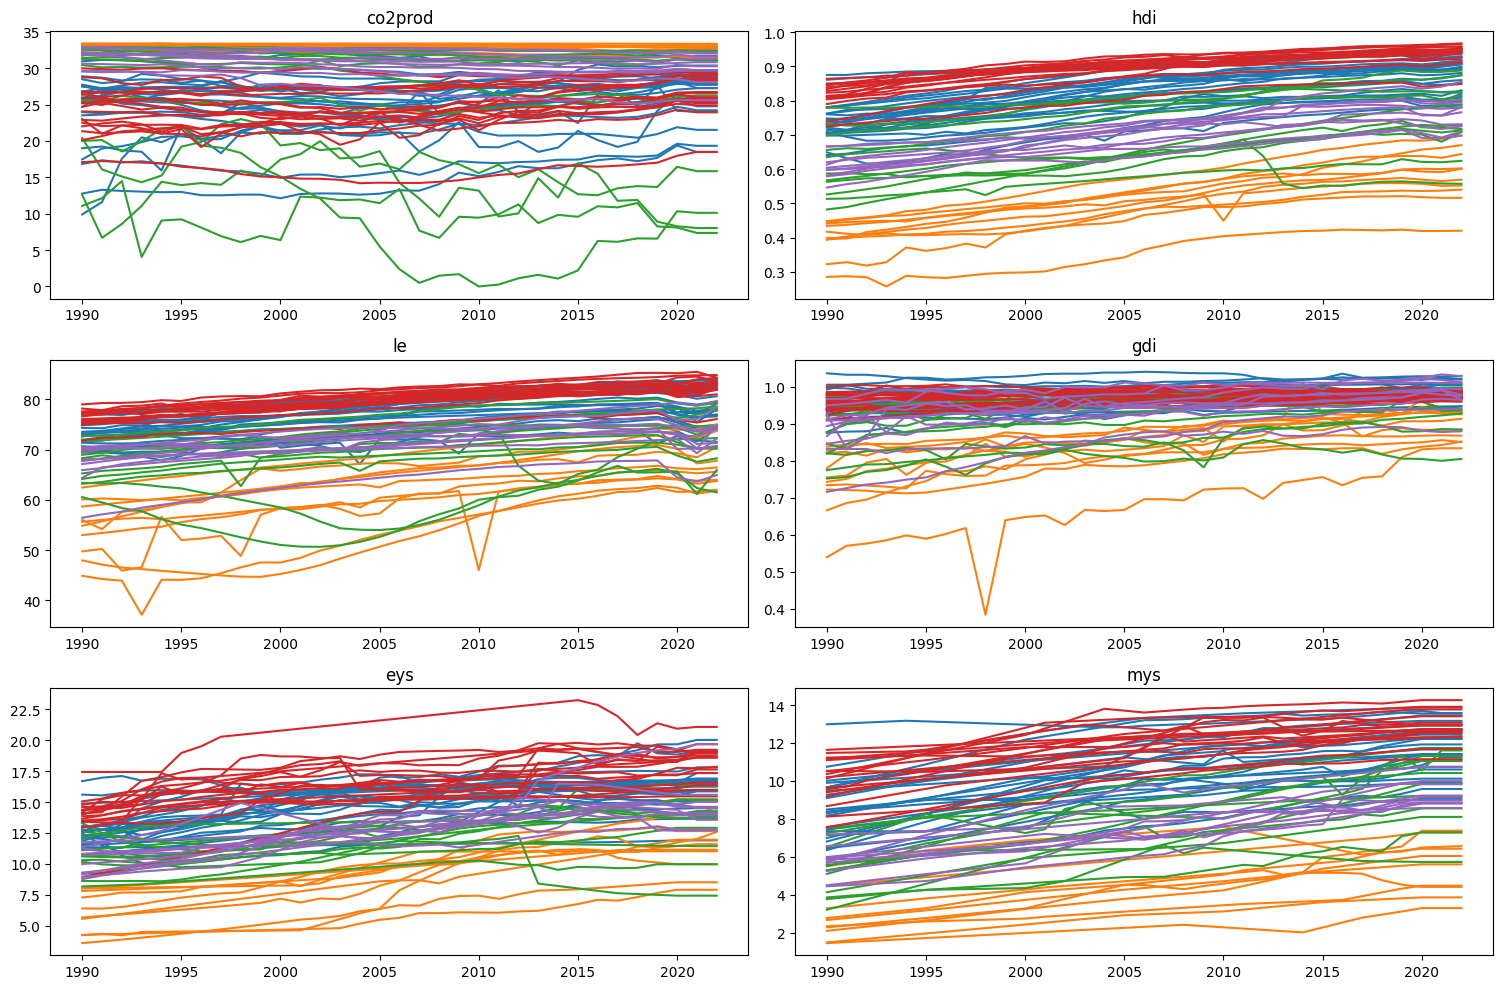

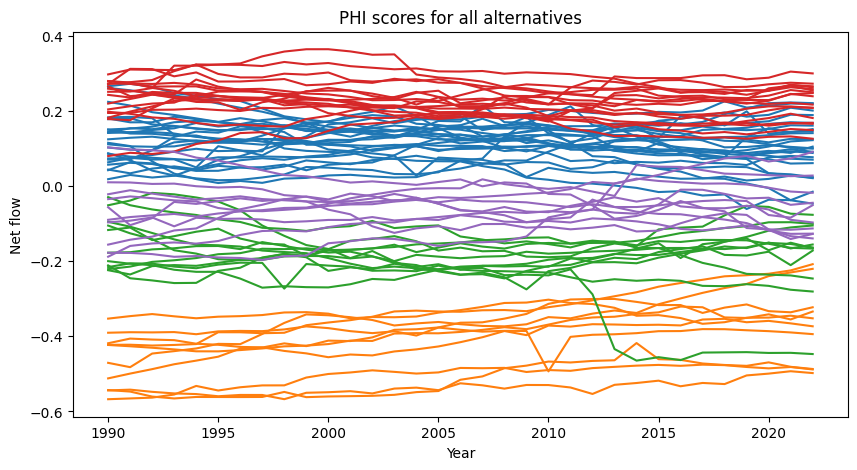

In [12]:
groups = []
for i in range(k):
    groups.append(results[i].index)

plot_cluster(groups, data, False)

plot_cluster_phi(PHI_df, groups, False, True)

## Test with smaller dataset

In [13]:
data = read_data()

Reading HDI dataset
co2prod: min=0.0, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=85.473
gdi: min=0.383, max=1.041
eys: min=3.5751, max=23.2477
mys: min=1.4606, max=14.2559


In [14]:
group0 = ["PAK", "SDN", "BDI", "HTI"]
group1 = ["EST", "CZE", "MLT", "SGP", "IRL"]
group2 = ["CHE", "ISL", "NZL", "SWE"]

all_groups = group0 + group1 + group2

data = data.loc[all_groups]

# Replace the names of the countries: grp_number_ISO3
# data.index = ["0_" + i for i in group0] + ["1_" + i for i in group1] + ["2_" + i for i in group2]

get_min_max_criteria(data, False)

co2prod: min=9.9, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=84.255
gdi: min=0.383, max=1.041
eys: min=3.5751, max=19.7613
mys: min=1.4606, max=13.9041


In [15]:
# Nb of criteria
K = data.columns.shape[0] # Nb of criteria
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series
N = data.shape[0] # Nb of alternatives

W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
P = [10, 0.4, 20, 0.3, 5, 5]
Q = [1, 0.03, 2, 0.01, 0.5, 0.5] # Indifference thresholds

phi_c_all = pf.get_all_Phi_c(data, P, Q, L) # compute all mono criterion flows series


c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


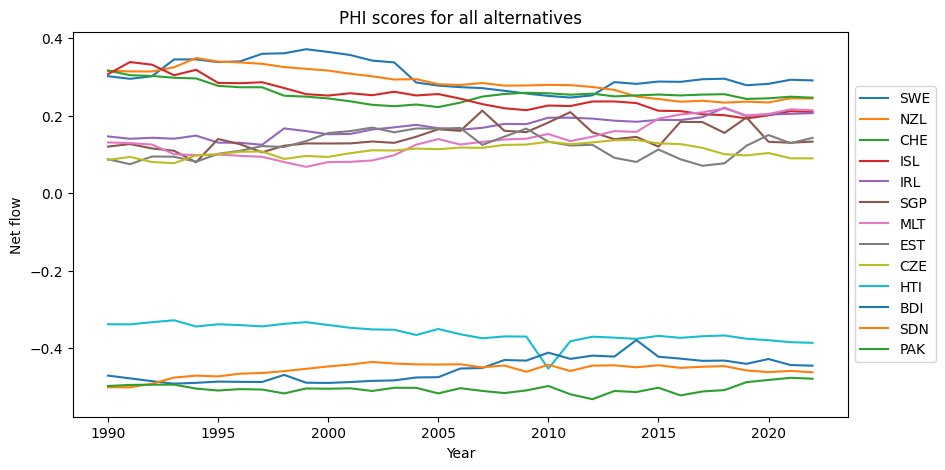

100%|██████████| 100/100 [00:00<00:00, 152.85it/s]


Cluster 0: Index(['PAK', 'SDN', 'BDI', 'HTI'], dtype='object', name='iso3')
Cluster 1: Index(['CHE', 'ISL', 'NZL', 'SWE'], dtype='object', name='iso3')
Cluster 2: Index(['EST', 'CZE', 'MLT', 'SGP', 'IRL'], dtype='object', name='iso3')


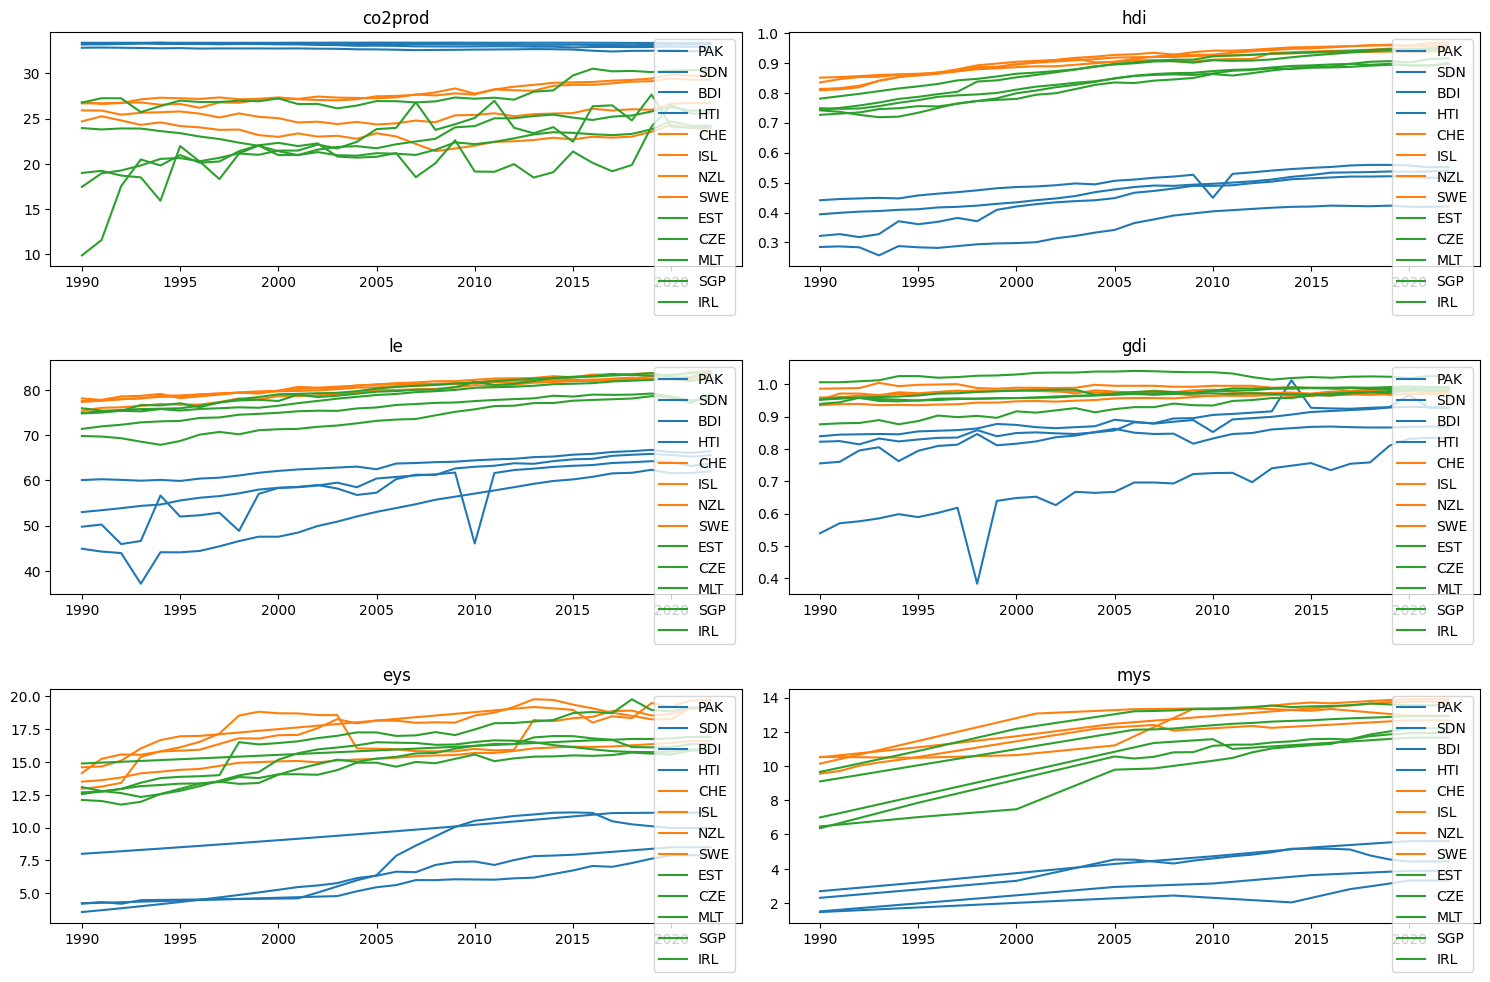

In [16]:
PHI = pf.PHI_all(phi_c_all, W, N, L, K) # Aggregate to the net flow series

# Transform PHI into a dataframe with ISO3 as index and years as columns
PHI_df = pd.DataFrame(PHI, index=data.index, columns=np.arange(1990, 2023))

plot_PHI(PHI_df, True)

k = 3
results = cf.kMeans(PHI_df, k, max_it=100, distance_function=cf.euclid_distance)

# Print the results
for i in range(k):
    print(f"Cluster {i}: {results[i].index}")

groups = []
for i in range(k):
    groups.append(results[i].index)

plot_cluster(groups, data, True)

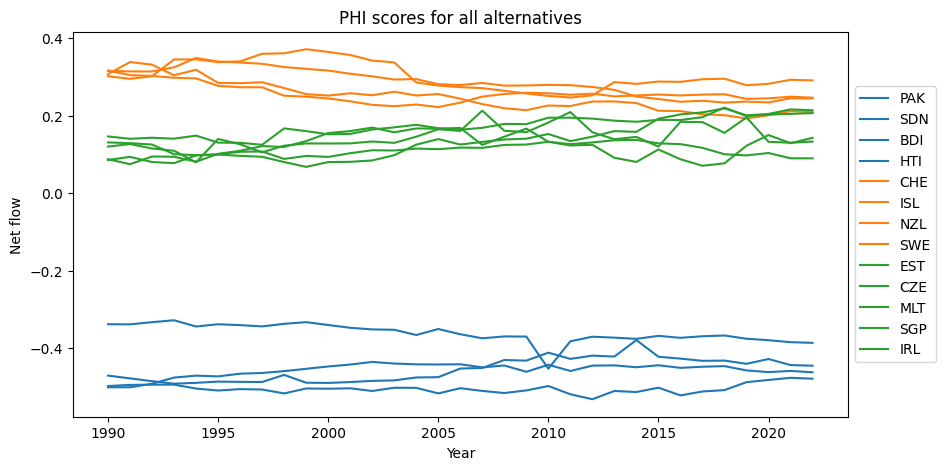

In [18]:
plot_cluster_phi(PHI_df, groups, True, True)

# 3. Evaluate the cluster quality

In [22]:
def get_centroids(data, groups):
    centroids = []
    for group in groups:
        group_data = data.loc[group]
        centroid = group_data.mean()
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, index=[f"Centroid {i}" for i in range(len(groups))], columns=data.columns)

    # Add the list of countries in each cluster
    centroids["Countries"] = [", ".join(group) for group
                              in groups]


    return centroids

centroids = get_centroids(PHI_df, groups)

centroids



,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Countries
Centroid 0,-0.452113,-0.453251,-0.451219,-0.447608,-0.452383,-0.451846,-0.449944,-0.450654,-0.445762,-0.445022,...,-0.429562,-0.434329,-0.443435,-0.440609,-0.438662,-0.440494,-0.438012,-0.441061,-0.443304,"PAK, SDN, BDI, HTI"
Centroid 1,0.309878,0.312570,0.312006,0.317565,0.326657,0.309399,0.308209,0.312812,0.301866,0.298785,...,0.253606,0.249106,0.246405,0.247199,0.245994,0.237265,0.240093,0.249090,0.247279,"CHE, ISL, NZL, SWE"
Centroid 2,0.113788,0.112545,0.111371,0.104034,0.100581,0.113957,0.113388,0.110273,0.115116,0.116990,...,0.140765,0.148179,0.157624,0.154728,0.154135,0.162584,0.158335,0.153577,0.156820,"EST, CZE, MLT, SGP, IRL"


In [25]:
def evaluate_clustering_dun_index(centroids, PHI_df):
    """ 
    Computes the DUNN index of a clustering
    - centroids: the centroids of the clusters (dataframe) with one row per cluster (last column is the list of countries in the cluster)
    - PHI_df: the net flow dataframe (ISO3 as index, years as columns)

    DUNN index = min_{i!=j} (d_{ij} / max_{k} (d_{k})
    where d_{ij} is the distance between the centroids i and j
    In other words: 
    """
    groups = [centroid["Countries"].split(", ") for i, centroid in centroids.iterrows()]
    centroids = centroids.drop(columns="Countries")
    # Compute the distance between each centroid (inter-cluster distance)
    distances = []
    for i in range(centroids.shape[0]):
        for j in range(i+1, centroids.shape[0]):
            distances.append(cf.euclid_distance(centroids.iloc[i], centroids.iloc[j]))

    

    # Compute the average distance between each point and its centroid
    intra_cluster_distances = []

    for i in range(centroids.shape[0]):
        group = groups[i]
        group_data = PHI_df.loc[group]
        intra_cluster_distances.append(group_data.apply(lambda x: cf.euclid_distance(x, centroids.iloc[i]), axis=1).mean())

    # Compute the DUNN index
    dunn_index = min(distances) / max(intra_cluster_distances)

    return dunn_index

evaluate_clustering_dun_index(centroids, PHI_df)


np.float64(2.955759666436756)